# BTC ML Trading Models Comparison

In [17]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import sys

sys.path.append('/Users/zway/Desktop/BTC_Project/Crypto_Research/features')
from trend_indicator_pipeline_pkg import TrendIndicatorPipeline, MomentumIndicatorPipeline, VolatilityIndicatorPipeline, CorrelationIndicatorPipeline, FractalDimensionPipeline

from arcticdb.version_store.helper import ArcticMemoryConfig
from arcticdb import Arctic

from sklearn.model_selection import train_test_split
from pycaret.classification import setup, compare_models, save_model, predict_model, pull, tune_model, finalize_model


In [5]:
# load dataset
df = pd.read_csv('/Users/zway/Desktop/BTC_Project/Crypto_Research/data/BTCUSD_2023-1min_ML.csv')

df = df.dropna()


In [ ]:
print(df.head())
df

       Unnamed: 0.1            Timestamp  ...  future_return  future_trend
50398         50398  2023-02-10 03:16:00  ...       0.009806             0
50399         50399  2023-02-10 03:17:00  ...       0.009642             0
50400         50400  2023-02-10 03:18:00  ...       0.009895             0
50401         50401  2023-02-10 03:19:00  ...       0.010315             0
50402         50402  2023-02-10 03:20:00  ...       0.010080             0

[5 rows x 26 columns]


In [27]:
# classification model setup
clf_setup = setup(
    data=df,
    target='future_trend',
    session_id=42,
    train_size=0.7,
    fold_shuffle=True,
    fold=12,
    verbose=False,
    ignore_features=['Unnamed: 0.1', 'Timestamp', 'Unnamed: 0', 'future_return']
)


In [28]:
top_models = compare_models(n_select=5)

results = pull()
print(results)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9998,1.0000,0.9996,0.9997,0.9997,0.9996,0.9996,2.2442
knn,K Neighbors Classifier,0.9983,0.9996,0.9965,0.9966,0.9966,0.9954,0.9954,6.6183
rf,Random Forest Classifier,0.9982,0.9999,0.9962,0.9967,0.9964,0.9952,0.9952,14.0058
et,Extra Trees Classifier,0.9981,0.9999,0.9961,0.9963,0.9962,0.9949,0.9949,2.7325
dt,Decision Tree Classifier,0.9977,0.9969,0.9954,0.9955,0.9955,0.9939,0.9939,1.4850
lightgbm,Light Gradient Boosting Machine,0.9972,0.9999,0.9938,0.9951,0.9945,0.9926,0.9926,0.9633
svm,SVM - Linear Kernel,0.9865,1.0000,0.9632,0.9851,0.9729,0.9640,0.9650,0.3333
gbc,Gradient Boosting Classifier,0.9839,0.9989,0.9446,0.9921,0.9677,0.9570,0.9576,38.1492
ada,Ada Boost Classifier,0.9687,0.9955,0.8955,0.9802,0.9359,0.9152,0.9169,7.3050
ridge,Ridge Classifier,0.9427,0.9951,0.7761,0.9997,0.8738,0.8375,0.8488,0.0908


/opt/anaconda3/envs/de_env/lib/python3.11/site-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


                                    Model  Accuracy  ...     MCC  TT (Sec)
lr                    Logistic Regression    0.9998  ...  0.9996    2.2442
knn                K Neighbors Classifier    0.9983  ...  0.9954    6.6183
rf               Random Forest Classifier    0.9982  ...  0.9952   14.0058
et                 Extra Trees Classifier    0.9981  ...  0.9949    2.7325
dt               Decision Tree Classifier    0.9977  ...  0.9939    1.4850
lightgbm  Light Gradient Boosting Machine    0.9972  ...  0.9926    0.9633
svm                   SVM - Linear Kernel    0.9865  ...  0.9650    0.3333
gbc          Gradient Boosting Classifier    0.9839  ...  0.9576   38.1492
ada                  Ada Boost Classifier    0.9687  ...  0.9169    7.3050
ridge                    Ridge Classifier    0.9427  ...  0.8488    0.0908
lda          Linear Discriminant Analysis    0.9090  ...  0.7574    0.1025
dummy                    Dummy Classifier    0.7446  ...  0.0000    0.0583
nb                       

In [29]:
# Example: tune top 5 models
tuned_models = [tune_model(m) for m in top_models]

# Finalize (retrain on entire dataset)
final_models = [finalize_model(m) for m in tuned_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,1.0000,0.9992,0.9995,0.9994,0.9992,0.9992
1,0.9998,1.0000,0.9995,0.9995,0.9995,0.9994,0.9994
2,0.9999,1.0000,0.9997,1.0000,0.9998,0.9998,0.9998
3,0.9998,1.0000,0.9998,0.9995,0.9997,0.9996,0.9996
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9998,1.0000,0.9997,0.9997,0.9997,0.9996,0.9996
6,0.9999,1.0000,0.9998,0.9998,0.9998,0.9998,0.9998
7,0.9998,1.0000,0.9992,0.9998,0.9995,0.9994,0.9994
8,0.9996,1.0000,0.9991,0.9995,0.9993,0.9991,0.9991


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9984,1.0000,0.9967,0.9972,0.9969,0.9959,0.9959
1,0.9983,0.9998,0.9969,0.9965,0.9967,0.9956,0.9956
2,0.9984,0.9999,0.9975,0.9964,0.9969,0.9959,0.9959
3,0.9984,0.9999,0.9967,0.9970,0.9969,0.9958,0.9958
4,0.9983,0.9998,0.9964,0.9970,0.9967,0.9956,0.9956
5,0.9986,0.9998,0.9970,0.9975,0.9972,0.9963,0.9963
6,0.9982,1.0000,0.9969,0.9959,0.9964,0.9951,0.9951
7,0.9982,0.9999,0.9956,0.9973,0.9965,0.9952,0.9952
8,0.9980,0.9998,0.9959,0.9961,0.9960,0.9946,0.9946


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9996,0.9481,0.9955,0.9713,0.9617,0.9622
1,0.9869,0.9996,0.9519,0.9967,0.9738,0.9651,0.9655
2,0.9843,0.9995,0.9417,0.9968,0.9685,0.9581,0.9588
3,0.9861,0.9996,0.9502,0.9951,0.9721,0.9628,0.9633
4,0.9853,0.9995,0.9463,0.9960,0.9705,0.9607,0.9613
5,0.9854,0.9996,0.9448,0.9980,0.9707,0.9610,0.9616
6,0.9866,0.9996,0.9505,0.9969,0.9731,0.9642,0.9647
7,0.9874,0.9996,0.9546,0.9961,0.9749,0.9665,0.9669
8,0.9858,0.9995,0.9469,0.9974,0.9715,0.9620,0.9626


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9541,0.9967,0.8235,0.9960,0.9016,0.8720,0.8787
1,0.9582,0.9971,0.8387,0.9970,0.9110,0.8840,0.8896
2,0.9559,0.9968,0.8296,0.9972,0.9057,0.8772,0.8835
3,0.9577,0.9971,0.8372,0.9968,0.9101,0.8827,0.8884
4,0.9546,0.9969,0.8260,0.9955,0.9029,0.8736,0.8800
5,0.9583,0.9971,0.8392,0.9970,0.9113,0.8843,0.8899
6,0.9560,0.9971,0.8306,0.9968,0.9061,0.8777,0.8840
7,0.9575,0.9969,0.8377,0.9953,0.9097,0.8822,0.8878
8,0.9561,0.9967,0.8322,0.9953,0.9064,0.8781,0.8841


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9944,0.9771,0.9881,0.9825,0.9766,0.9766
1,0.9933,0.9965,0.9862,0.9874,0.9868,0.9823,0.9823
2,0.9940,0.9971,0.9870,0.9896,0.9883,0.9843,0.9843
3,0.9933,0.9974,0.9863,0.9876,0.9869,0.9825,0.9825
4,0.9933,0.9957,0.9824,0.9913,0.9868,0.9823,0.9823
5,0.9933,0.9966,0.9837,0.9902,0.9869,0.9824,0.9825
6,0.9936,0.9970,0.9868,0.9880,0.9874,0.9831,0.9831
7,0.9931,0.9961,0.9876,0.9854,0.9865,0.9819,0.9819
8,0.9937,0.9968,0.9857,0.9897,0.9877,0.9835,0.9835


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
# Run predictions on hold-out test set
for model in top_models:
    print(model)
    pred = predict_model(model)
    print(pred.head())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9998,1.0000,0.9996,0.9998,0.9997,0.9996,0.9996


                Open          High  ...  prediction_label  prediction_score
203636  27248.400391  27261.000000  ...                 0               1.0
124765  28192.099609  28204.400391  ...                 0               1.0
104028  27856.699219  27882.199219  ...                 0               1.0
400979  34277.398438  34295.199219  ...                 0               1.0
362102  27251.800781  27262.699219  ...                 0               1.0

[5 rows x 24 columns]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9983,0.9996,0.9968,0.9968,0.9968,0.9956,0.9956


                Open          High  ...  prediction_label  prediction_score
203636  27248.400391  27261.000000  ...                 0               1.0
124765  28192.099609  28204.400391  ...                 0               1.0
104028  27856.699219  27882.199219  ...                 0               1.0
400979  34277.398438  34295.199219  ...                 0               1.0
362102  27251.800781  27262.699219  ...                 0               1.0

[5 rows x 24 columns]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       w

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9983,1.0000,0.9963,0.9969,0.9966,0.9955,0.9955


                Open          High  ...  prediction_label  prediction_score
203636  27248.400391  27261.000000  ...                 0               1.0
124765  28192.099609  28204.400391  ...                 0               1.0
104028  27856.699219  27882.199219  ...                 0               1.0
400979  34277.398438  34295.199219  ...                 0               1.0
362102  27251.800781  27262.699219  ...                 0               1.0

[5 rows x 24 columns]
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9981,0.9999,0.9960,0.9965,0.9962,0.9949,0.9949


                Open          High  ...  prediction_label  prediction_score
203636  27248.400391  27261.000000  ...                 0               1.0
124765  28192.099609  28204.400391  ...                 0               1.0
104028  27856.699219  27882.199219  ...                 0               1.0
400979  34277.398438  34295.199219  ...                 0               1.0
362102  27251.800781  27262.699219  ...                 0               1.0

[5 rows x 24 columns]
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=42, splitter='best')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9978,0.9971,0.9956,0.9958,0.9957,0.9943,0.9943


                Open          High  ...  prediction_label  prediction_score
203636  27248.400391  27261.000000  ...                 0               1.0
124765  28192.099609  28204.400391  ...                 0               1.0
104028  27856.699219  27882.199219  ...                 0               1.0
400979  34277.398438  34295.199219  ...                 0               1.0
362102  27251.800781  27262.699219  ...                 0               1.0

[5 rows x 24 columns]



Backtesting model: LogisticRegression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9998,1.0000,0.9997,0.9997,0.9997,0.9996,0.9996


Initial Capital      : $10,000.00
Final Portfolio Value: $30,705.38
Net Profit           : $20,705.38
Total Return         : 207.05%
Sharpe Ratio         : 6.00
Max Drawdown         : -5.07%
Win Rate             : 70.35%
Total Trades         : 570


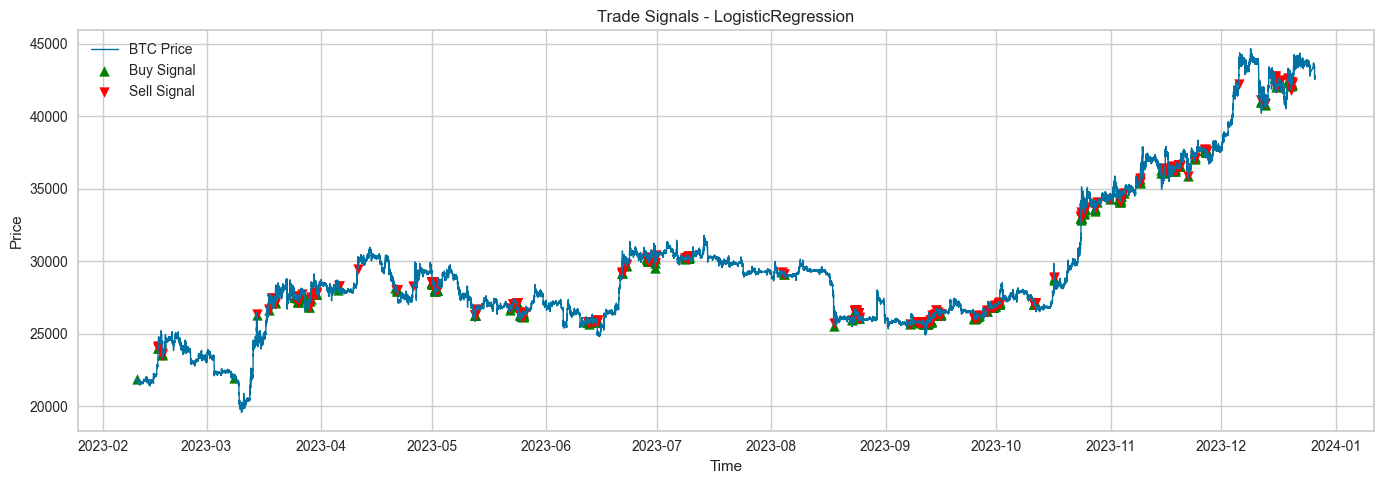

<Figure size 1400x400 with 0 Axes>

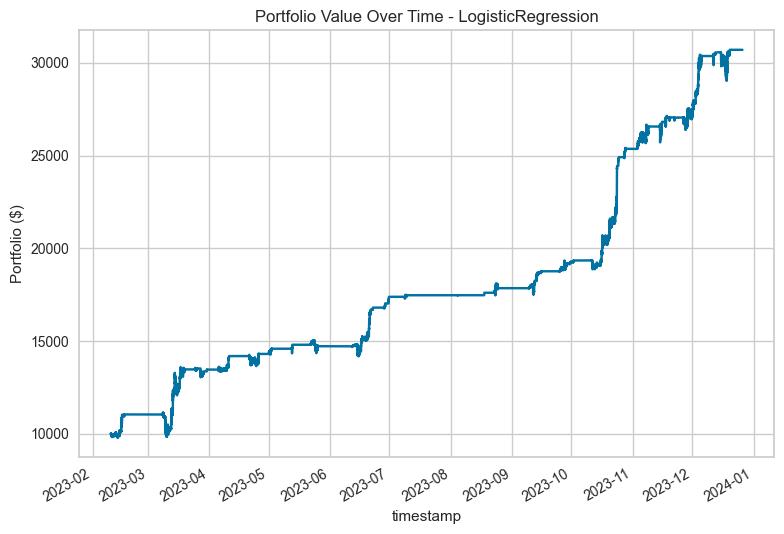


Backtesting model: KNeighborsClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9988,0.9999,0.9976,0.9976,0.9976,0.9967,0.9967


Initial Capital      : $10,000.00
Final Portfolio Value: $31,344.08
Net Profit           : $21,344.08
Total Return         : 213.44%
Sharpe Ratio         : 6.07
Max Drawdown         : -5.12%
Win Rate             : 71.25%
Total Trades         : 400


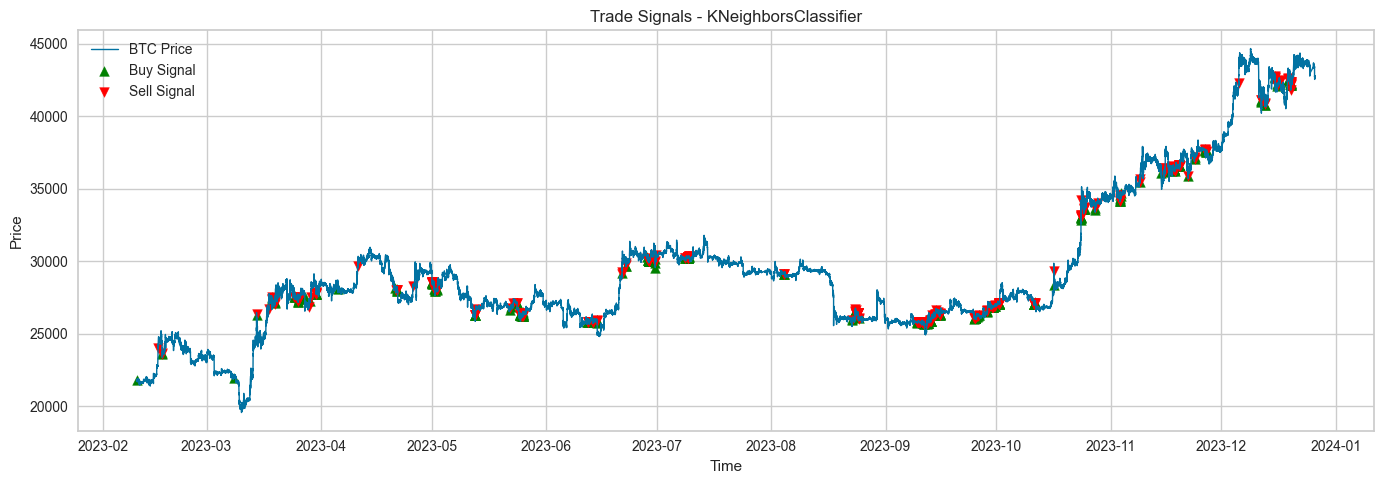

<Figure size 1400x400 with 0 Axes>

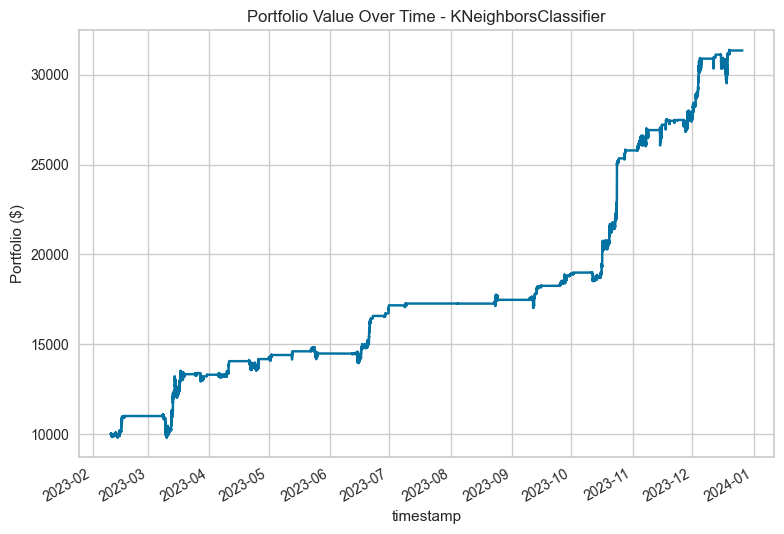


Backtesting model: RandomForestClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9995,1.0000,0.9989,0.9991,0.9990,0.9986,0.9986


Initial Capital      : $10,000.00
Final Portfolio Value: $29,830.59
Net Profit           : $19,830.59
Total Return         : 198.31%
Sharpe Ratio         : 5.85
Max Drawdown         : -5.12%
Win Rate             : 71.61%
Total Trades         : 479


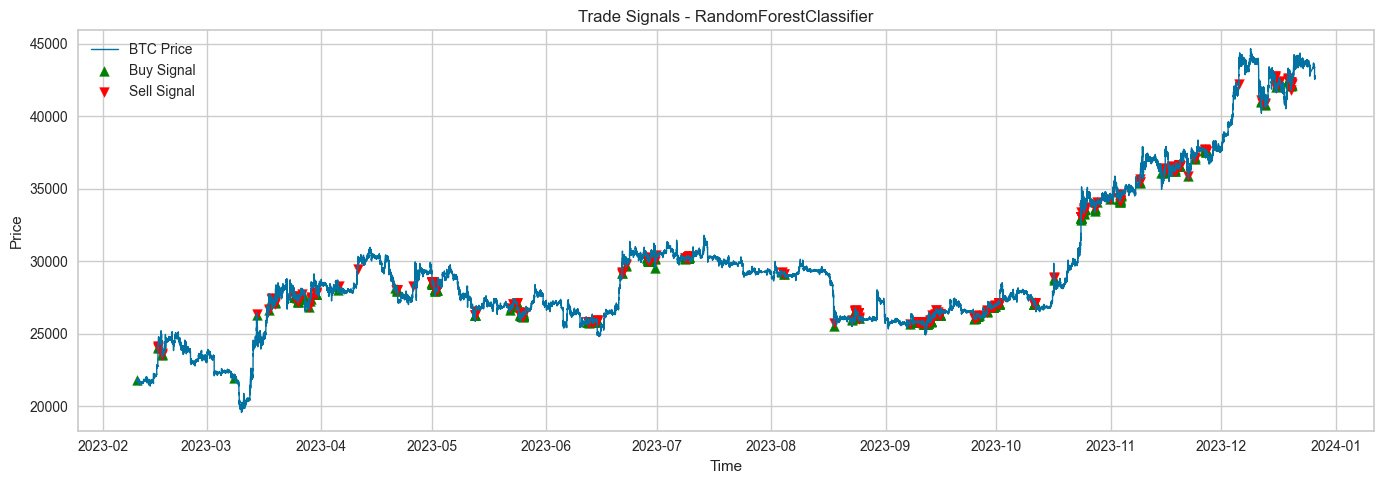

<Figure size 1400x400 with 0 Axes>

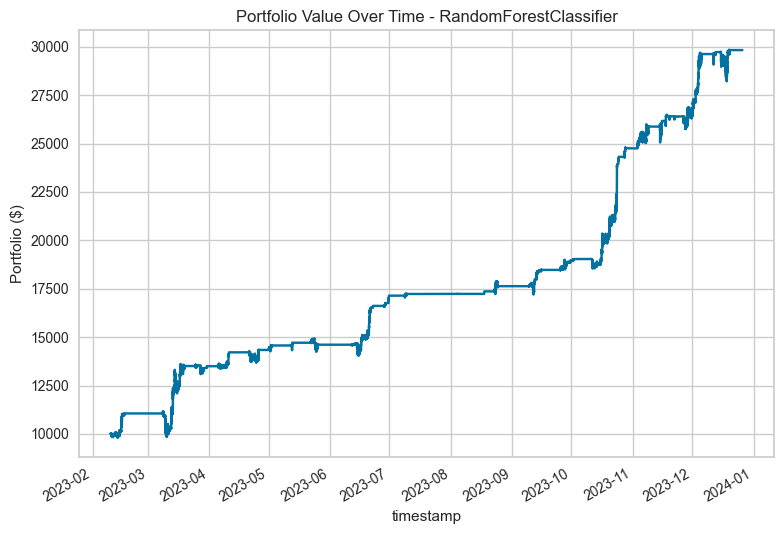


Backtesting model: ExtraTreesClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9994,1.0000,0.9988,0.9989,0.9989,0.9985,0.9985


Initial Capital      : $10,000.00
Final Portfolio Value: $30,086.29
Net Profit           : $20,086.29
Total Return         : 200.86%
Sharpe Ratio         : 5.89
Max Drawdown         : -4.99%
Win Rate             : 71.31%
Total Trades         : 467


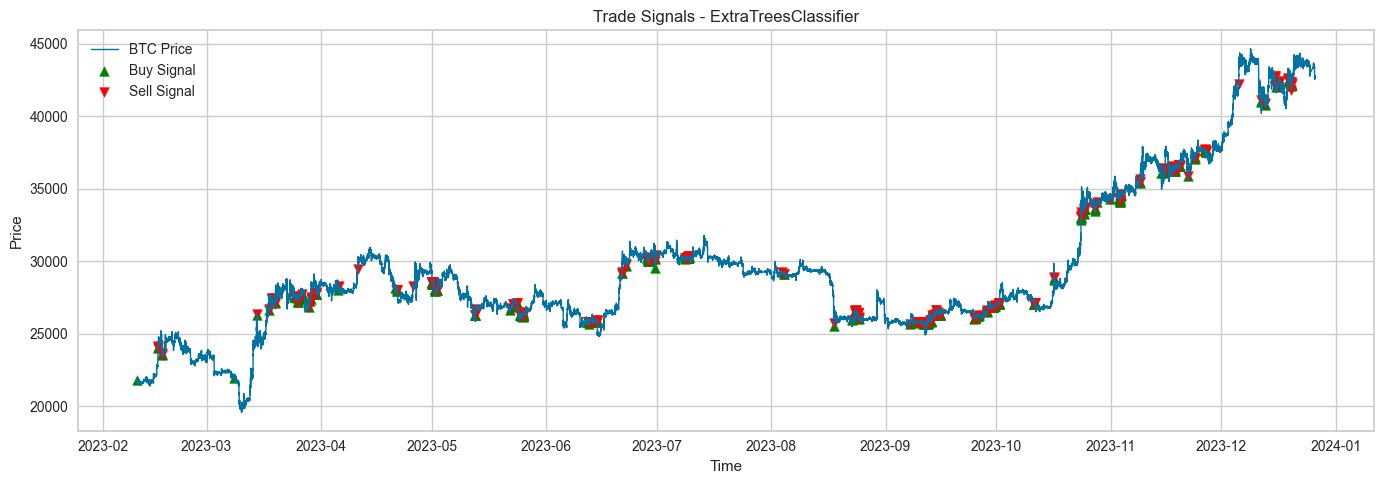

<Figure size 1400x400 with 0 Axes>

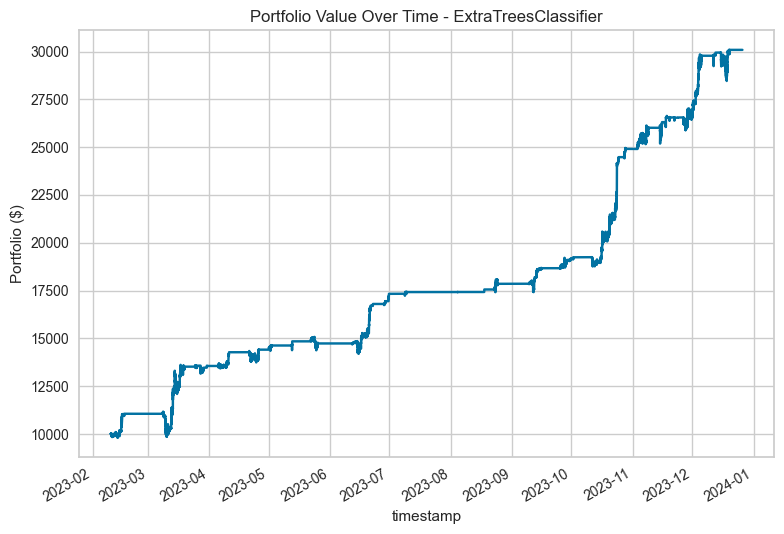


Backtesting model: DecisionTreeClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9993,0.9991,0.9987,0.9987,0.9987,0.9983,0.9983


Initial Capital      : $10,000.00
Final Portfolio Value: $30,555.03
Net Profit           : $20,555.03
Total Return         : 205.55%
Sharpe Ratio         : 5.97
Max Drawdown         : -5.14%
Win Rate             : 71.20%
Total Trades         : 566


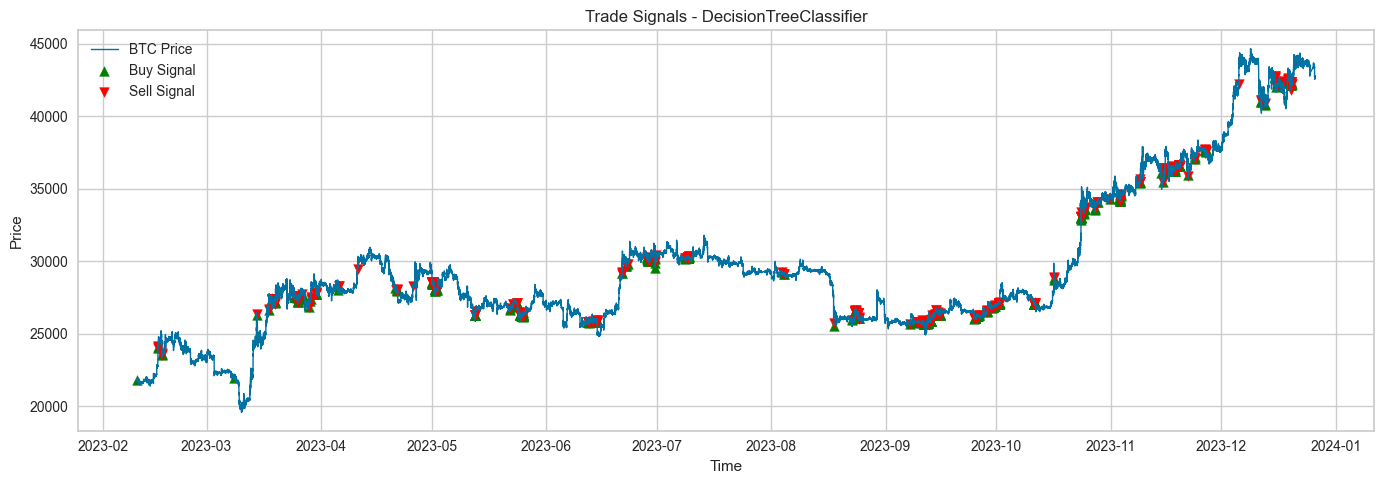

<Figure size 1400x400 with 0 Axes>

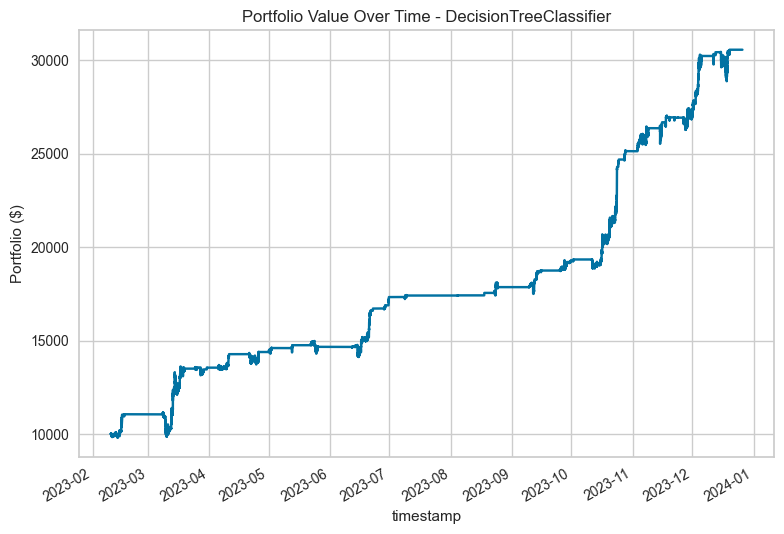

In [31]:
# backtesting
initial_capital = 10000
strategy_results = {}

for model in top_models:
    model_name = model.__class__.__name__
    print(f'\nBacktesting model: {model_name}')

    # Predict
    pred_df = predict_model(model, data=df.copy())
    pred_df['timestamp'] = pd.to_datetime(pred_df['Timestamp'])
    pred_df.set_index('timestamp', inplace=True)

    # Initialize variables
    position = 0
    cash = initial_capital
    trade_log = []
    portfolio_values = []

    for i in range(len(pred_df) - 1):
        row = pred_df.iloc[i]
        next_price = pred_df.iloc[i + 1]['Close']
        signal = row['prediction_label']
        current_price = row['Close']
        date = row.name

        # Buy signal
        if signal == 1 and position == 0:
            position = cash / current_price
            trade_log.append({'timestamp': date, 'action': 'buy', 'price': current_price, 'cash': 0})
            cash = 0

        # Sell signal
        elif signal == 0 and position > 0:
            cash = position * current_price
            trade_log.append({'timestamp': date, 'action': 'sell', 'price': current_price, 'cash': cash})
            position = 0

        # Record current portfolio value
        portfolio_value = cash if position == 0 else position * current_price
        portfolio_values.append({'timestamp': date, 'portfolio': portfolio_value})

    # Final portfolio value at the last point
    final_value = cash if position == 0 else position * pred_df['Close'].iloc[-1]
    portfolio_values.append({'timestamp': pred_df.index[-1], 'portfolio': final_value})

    # compute metrics
    port_df = pd.DataFrame(portfolio_values).set_index('timestamp')
    returns = port_df['portfolio'].pct_change().dropna()
    trade_df = pd.DataFrame(trade_log)
    
    
    net_profit = final_value - initial_capital
    total_return = (net_profit / initial_capital) * 100
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(365 * 24 * 60) if returns.std() != 0 else 0
    drawdown = port_df['portfolio'].cummax() - port_df['portfolio']
    max_drawdown = drawdown.max() / port_df['portfolio'].cummax().max() * 100
    
    # calculate win rate, and count number of trades
    paired_trades = []
    position_row = None
    
    for _, row in trade_df.iterrows():
        if row['action'] == 'buy':
            position_row = row
        elif row['action'] == 'sell' and position_row is not None:
            pnl = row['price'] - position_row['price']
            paired_trades.append({'entry': position_row['price'], 'exit': row['price'], 'pnl': pnl})
            position_row = None
    paired_df = pd.DataFrame(paired_trades)
    win_rate = (paired_df['pnl'] > 0).mean() * 100 if len(paired_df) > 0 else 0
    trade_count = len(paired_df)
            
    # store results
    strategy_results[model_name] = {
        'portfolio': port_df,
        'trades': pd.DataFrame(trade_log),
        'final_value': final_value,
        'return_%': total_return,
        'sharpe': sharpe_ratio,
        'drawdown': max_drawdown,
        'win_rate': win_rate,
        'trade_count': trade_count
    }
    
    # print performance
    print(f'Initial Capital      : ${initial_capital:,.2f}')
    print(f'Final Portfolio Value: ${final_value:,.2f}')
    print(f'Net Profit           : ${net_profit:,.2f}')
    print(f'Total Return         : {total_return:.2f}%')
    print(f'Sharpe Ratio         : {sharpe_ratio:.2f}')
    print(f'Max Drawdown         : -{max_drawdown:.2f}%')
    print(f'Win Rate             : {win_rate:.2f}%')
    print(f"Total Trades         : {trade_count}")
    

    # --- PLOT TRADE SIGNALS ---
    plt.figure(figsize=(14, 5))
    plt.plot(pred_df['Close'], label='BTC Price', linewidth=1)

    buy_signals = strategy_results[model_name]['trades'].query("action == 'buy'")
    sell_signals = strategy_results[model_name]['trades'].query("action == 'sell'")
    
    plt.scatter(buy_signals['timestamp'], buy_signals['price'], marker='^', color='green', label='Buy Signal')
    plt.scatter(sell_signals['timestamp'], sell_signals['price'], marker='v', color='red', label='Sell Signal')

    plt.title(f'Trade Signals - {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    # --- PLOT PORTFOLIO VALUE ---
    plt.figure(figsize=(14, 4))
    strategy_results[model_name]['portfolio'].plot(legend=False)
    plt.title(f'Portfolio Value Over Time - {model_name}')
    plt.ylabel('Portfolio ($)')
    plt.tight_layout()
    plt.show()
